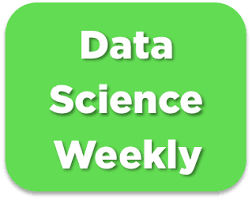

# Challenge : predict conversions 🏆🏆

This is the template that shows the different steps of the challenge. In this notebook, all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the preprocessing/training steps to get the model with the best f1-score ! May the force be with you 🧨🧨  

**For a detailed description of this project, please refer to *02-Conversion_rate_challenge.ipynb*.**

# Import libraries

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
! pip install plotly
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE
from IPython.display import display

# Read file with labels

In [51]:
datsub= pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', datsub.shape)

Set with labels (our train+test) : (284580, 6)


In [52]:
# Basic statistics

print("Basics statistics: ")
data_desc = datsub.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*datsub.isnull().sum()/datsub.shape[0])
print()

Basics statistics: 


,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000



Percentage of missing values: 


country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

# Explore dataset

In [63]:
# The dataset is quite big : you must create a sample of the dataset before making any visualizations !
sumup = datsub.sample(10000)

In [64]:
sumup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 125619 to 239973
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   country              10000 non-null  object
 1   age                  10000 non-null  int64 
 2   new_user             10000 non-null  int64 
 3   source               10000 non-null  object
 4   total_pages_visited  10000 non-null  int64 
 5   converted            10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 546.9+ KB


In [68]:
sumup['total_pages_visited'].unique()

array([ 2,  1,  4,  8,  9, 12,  5,  6,  3,  7, 10, 11, 13, 21, 15, 16, 14,
       19, 18, 20, 17, 22, 23])

<AxesSubplot:>

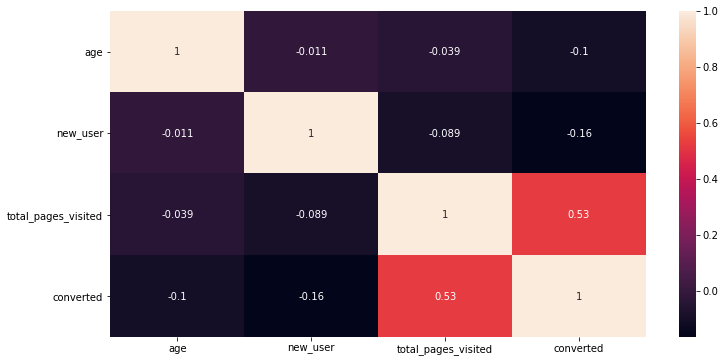

In [65]:
corr = sumup.corr()
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, annot=True, ax=ax)

#### Coorelation between total pages visited and converted

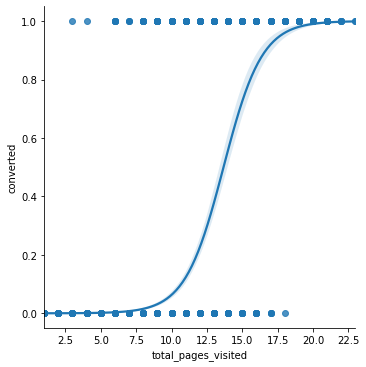

In [69]:
sns.lmplot(x = 'total_pages_visited' , y = 'converted' , data = sumup, logistic= True)


#### Probability increases with the increasing of total pages visited

# Make your model

## Choose variables to use in the model, and create train and test sets
**From the EDA, we know that the most useful feature is total_pages_visited. Let's create a baseline model by using at first only this feature : in the next cells, we'll make preprocessings and train a simple (univariate) logistic regression.**

## Définir les variables retenues X et la target Y ##

In [82]:
features_list = ['total_pages_visited']
target_variable = 'converted'

In [83]:
X = sumup.loc[:, features_list]
Y = sumup.loc[:, target_variable]
X

,total_pages_visited
125619,2
145280,1
122442,4
190127,8
234724,9
...,...
221816,2
277336,3
135868,10
171838,5


## REALISER LE TRAIN/TEST SPLIT ##

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## CONVERTIR EN NUMPY ARRAY ##

In [85]:
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

## PIPELINE NUMERIQUE ##

In [88]:
numeric_features = [0]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())
])

## PIPELINE CATEGORIEL ##

In [ ]:
categorical_features = [0]

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
    ])

## CREATION PIPELINE TRANSFORMER ##

In [90]:
preprocessor = ColumnTransformer(
    
    transformers=[
        ('num', numeric_transformer, numeric_features),
        
    ])

## Lancer le fit transform et transform sur les X ##

In [91]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## ENCODER LA VARIABLE Y ##

In [92]:
labelEncoder = LabelEncoder()

Y_train = labelEncoder.fit_transform(Y_train)

Y_test = labelEncoder.transform(Y_test)


## ENTRAINER LE MODELE SUR TRAIN SET ##

In [93]:
#Logistic regression
classifier = LogisticRegression() # OU AUTRE MODELE
classifier.fit(X_train, Y_train)

LogisticRegression()

## PREDICTION D'Y SUR LE TRAIN SET ##

In [94]:
Y_train_pred = classifier.predict(X_train)

## Encoding categorical features and standardizing numerical features... ##

## PREDICTION D'Y SUR LE TEST SET ##

In [95]:
Y_test_pred = classifier.predict(X_test)

## Evalutation des performances globales ##

In [96]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.704225352112676
f1-score on test set :  0.5714285714285714


In [97]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[7724   32]
 [  94  150]]

Confusion matrix on test set : 
[[1915   15]
 [  36   34]]



## DECISION TREE ##

In [98]:
classifier = DecisionTreeClassifier(criterion="gini")
params = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8]
}
gridsearch = GridSearchCV(classifier, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

...Done.
Best hyperparameters :  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best validation accuracy :  0.9842501401503356


In [99]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 1 0 0]



In [100]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [101]:
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

f1-score on train set :  0.704225352112676
f1-score on test set :  0.5714285714285714



**Our baseline model reaches a f1-score of almost 70%. Now, feel free to refine your model and try to beat this score ! 🚀🚀**

# Train best classifier on all data and use it to make predictions on X_without_labels
**Before making predictions on the file conversion_data_test.csv, let's train our model on ALL the data that was in conversion_data_train.csv. Sometimes, this allows to make tiny improvements in the score because we're using more examples to train the model.**

In [ ]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

In [ ]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['country','age','total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

In [ ]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")
X_without_labels = preprocessor.transform(X_without_labels)

In [ ]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_EXAMPLE.csv', index=False)


## Analyzing the coefficients and interpreting the result
**In this template, we just trained a model with only one feature (total_pages_visited), so there's no analysis to be done about the feature importance 🤔**

**Once you've included more features in your model, please take some time to analyze the model's parameters and try to find some lever for action to improve the newsletter's conversion rate 😎😎**